### Importing data

In [1]:
import numpy
import urllib.request
import scipy.optimize
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm

In [2]:
def parseData(fname):
  for l in urllib.request.urlopen(fname):
    yield eval(l)


In [3]:
print ("Reading data...")
data = list(parseData("http://jmcauley.ucsd.edu/cse190/data/beer/beer_50000.json"))
print ("done")

Reading data...
done


In [ ]:
def feature(datum):
  feat = [1]
  return feat

X = [feature(d) for d in data]
y = [d['review/overall'] for d in data]
theta,residuals,rank,s = numpy.linalg.lstsq(X, y)


## Regression
### Question 1

In [57]:
taste = [d['review/taste'] for d in data]

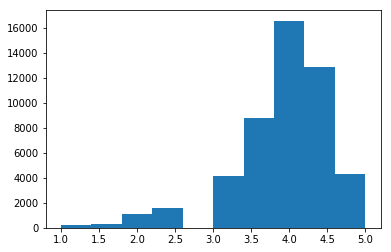

1 star(s):211
2 star(s):1099
3 star(s):4137
4 star(s):16575
5 star(s):4331


In [205]:
plt.hist(taste)
plt.show()
for i in range(1,6):
    print(str(i) + ' star(s):' + str(taste.count(i)))

## Question 2

In [75]:
beerNames = [d['beer/name'] for d in data]

In [84]:
beers = [{'name': name, 'rating': 0} for name in beerNames if beerNames.count(name) >= 5]

In [102]:
for beer in beers:
    ratings = [d['review/overall'] for d in data if d['beer/name'] == beer['name']]
    beer['rating'] = sum(ratings)/len(ratings)

In [103]:
max(beers, key=lambda x:x['rating'])

{'name': 'Wobbly Bob APA', 'rating': 4.714285714285714}

### Question 3

In [112]:
### How tasty is a beer? ###

data2 = [d for d in data if 'beer/style' in d and 'beer/ABV' in d]

def feature(datum):
  feat = [1]
  isHefeweizen = 1 if datum['beer/style'] == 'Hefeweizen' else 0
  feat.append(isHefeweizen)
  feat.append(datum['beer/ABV'])
  return feat

X = [feature(d) for d in data2]
y = [d['review/taste'] for d in data2]
theta,residuals,rank,s = numpy.linalg.lstsq(X, y)

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [117]:
theta

array([ 3.11795084, -0.05637406,  0.10877902])

The values in theta array shows that the default taste rating is 3.11795084. It decreases by 0.05637406 if the beer is a Hefeweizen and increases by 0.10877902 for each 1 ABV the beer has.

### Question 4

In [188]:
### How tasty is a beer? ###
data2 = [d for d in data if 'beer/style' in d and 'beer/ABV' in d]
train = data[:len(data2)//2]
test = data[len(data2)//2:]

def feature(datum):
  feat = [1]
  isHefeweizen = 1 if datum['beer/style'] == 'Hefeweizen' else 0
  feat.append(isHefeweizen)
  feat.append(datum['beer/ABV'])
  return feat

X = [feature(d) for d in train]
y = [d['review/taste'] for d in train]
theta,residuals,rank,s = numpy.linalg.lstsq(X, y)

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


#### MSE for train

In [189]:
X = numpy.matrix(X)
y = numpy.matrix(y)
theta = numpy.matrix(theta)

mse = 0
for i in range(0,len(y)):
    mse += (y.item(i) - X[i]*theta.T)**2
mse = mse/len(y)

In [190]:
mse

matrix([[4.18119268]])

#### MSE for test

In [191]:
X = [feature(d) for d in test]
y = [d['review/taste'] for d in test]
X = numpy.matrix(X)
y = numpy.matrix(y)

mse = 0
for i in range(0,len(y)):
    mse += (y.item(i) - X[i]*theta.T)**2
mse = mse/len(y)

In [192]:
mse

matrix([[0.05415694]])

### Question 5

In [195]:
### How tasty is a beer? ###

data2 = [d for d in data if 'beer/style' in d and 'beer/ABV' in d]
y = [d['review/taste'] for d in data2]

X_train, X_test, y_train, y_test = train_test_split(data2, y, test_size=0.50)

def feature(datum):
  feat = [1]
  isHefeweizen = 1 if datum['beer/style'] == 'Hefeweizen' else 0
  feat.append(isHefeweizen)
  feat.append(datum['beer/ABV'])
  return feat

X = [feature(d) for d in X_train]
theta,residuals,rank,s = numpy.linalg.lstsq(X, y_train)

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()


#### MSE for train

In [196]:
X = numpy.matrix(X)
y = numpy.matrix(y_train)
theta = numpy.matrix(theta)

mse = 0
for i in range(0,len(y)):
    mse += (y.item(i) - X[i]*theta.T)**2
mse = mse/len(y)

In [197]:
mse

matrix([[0.02269626]])

#### MSE for test

In [198]:
X = [feature(d) for d in X_test]
X = numpy.matrix(X)
y = numpy.matrix(y_test)

mse = 0
for i in range(0,len(y)):
    mse += (y.item(i) - X[i]*theta.T)**2
mse = mse/len(y)

In [199]:
mse

matrix([[0.25103963]])

In this case the train mse was lower and the test mse was higher than in the other experiment. This may be because the data was inittially ordered based in some feature, so when dividing the test and training sets, we have very different datasets. This way, the errors are very discrepant.

When we shuffle the data before splitting it, the two resultant datasets are more likely to be similar, resulting in similar mse's.

### Question 6

In [18]:
### SVM -- "Is the beer a Hefeweizen?"
data2 = [d for d in data if 'review/taste' in d and 'review/appearance' in d and 'review/aroma' in d and 'review/palate' in d and 'review/overall' in d]
X = [[d['review/taste'], d['review/appearance'], d['review/aroma'], d['review/palate'], d['review/overall']] for d in data2]
y = ["Hefeweizen" in b['beer/style'] for b in data2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

In [19]:
# Create a support vector classifier object, with regularization parameter C = 1000
clf = svm.SVC(C=1000, kernel='linear')
clf.fit(X_train, y_train)

train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [21]:
train_accuracy = train_predictions == y_train
train_accuracy = train_accuracy.sum()/train_accuracy.size
print('Train accuracy with c=' + str(c) + ': ' + str(train_accuracy))

test_accuracy = test_predictions == y_test
test_accuracy = test_accuracy.sum()/test_accuracy.size
print('Test accuracy with c=' + str(c) + ': ' + str(test_accuracy))

Train accuracy with c=1000: 0.98808
Test accuracy with c=1000: 0.9872


### Question 7

For the new predictor I will use the following features vector:

['review/taste', 'review/appearance', 'review/aroma', 'review/palate', 'review/overall', 'user/gender']

In [22]:
data2 = [d for d in data if 'review/taste' in d and 'review/appearance' in d and 'review/aroma' in d and 'review/palate' in d and 'review/overall' in d and 'user/gender' in d]
X = [[d['review/taste'], d['review/appearance'], d['review/aroma'], d['review/palate'], d['review/overall'], 0 if d['user/gender'] == 'Female' else 1] for d in data2]
y = ["Hefeweizen" in b['beer/style'] for b in data2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

In [23]:
clf = svm.SVC(C=1000, kernel='linear')
clf.fit(X_train, y_train)

train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [24]:
train_accuracy = train_predictions == y_train
train_accuracy = train_accuracy.sum()/train_accuracy.size
print('Train accuracy with c=' + str(c) + ': ' + str(train_accuracy))

test_accuracy = test_predictions == y_test
test_accuracy = test_accuracy.sum()/test_accuracy.size
print('Test accuracy with c=' + str(c) + ': ' + str(test_accuracy))

Train accuracy with c=1000: 0.9887265954318204
Test accuracy with c=1000: 0.9888257204469711


### Question 8

In [25]:
for c in [0.1, 10, 1000, 100000]:
    clf = svm.SVC(C=c, kernel='linear')
    clf.fit(X_train, y_train)

    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)
    
    train_accuracy = train_predictions == y_train
    train_accuracy = train_accuracy.sum()/train_accuracy.size
    print('Train accuracy with c=' + str(c) + ': ' + str(train_accuracy))

    test_accuracy = test_predictions == y_test
    test_accuracy = test_accuracy.sum()/test_accuracy.size
    print('Test accuracy with c=' + str(c) + ': ' + str(test_accuracy))

Train accuracy with c=0.1: 0.9887265954318204
Test accuracy with c=0.1: 0.9888257204469711
Train accuracy with c=10: 0.9887265954318204
Test accuracy with c=10: 0.9888257204469711
Train accuracy with c=1000: 0.9887265954318204
Test accuracy with c=1000: 0.9888257204469711
Train accuracy with c=100000: 0.9887265954318204
Test accuracy with c=100000: 0.9888257204469711


The accuracy didn't increase significantly, but it took longer to compute the bigger the constant C was.